In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("dataset.csv")

Solution = pd.DataFrame({
    "subtaskID": [],
    "Value1": [],
    "Value2": []
})

<Axes: xlabel='latitude', ylabel='longitude'>

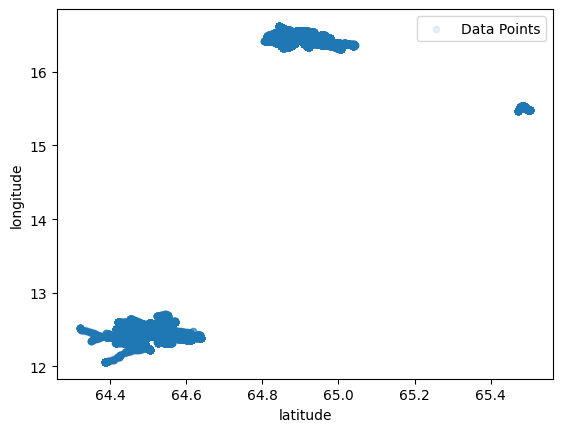

In [4]:
X.plot(x="latitude", y="longitude", kind="scatter",  
       alpha=0.1, label="Data Points")

In [5]:
# task 1

distinct_vehicle_types = X["vehicle_type"].value_counts().size
distinct_vehicles = X["id"].value_counts().size

Solution.loc[len(Solution)] = [1, distinct_vehicles, distinct_vehicle_types]

Solution

,subtaskID,Value1,Value2
0,1,663,4


In [ ]:
# task 2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X[["latitude", "longitude"]])

X["label"] = kmeans.labels_

task2_df = pd.DataFrame({
        "subtaskID": 2,
        "Value1": X["id"],
        "Value2": kmeans.labels_
    })

unique_vehicles = task2_df.groupby("Value1", as_index=False).first()

unique_vehicles = unique_vehicles[["subtaskID", "Value1", "Value2"]]

Solution = pd.concat([
    Solution,
    unique_vehicles
])

kmeans.cluster_centers_

array([[64.50956724, 12.4575878 ],
       [64.89735183, 16.44837628],
       [65.49352634, 15.4916497 ]])

ValueError: 'c' argument has 13214 elements, which is inconsistent with 'x' and 'y' with size 2058806.

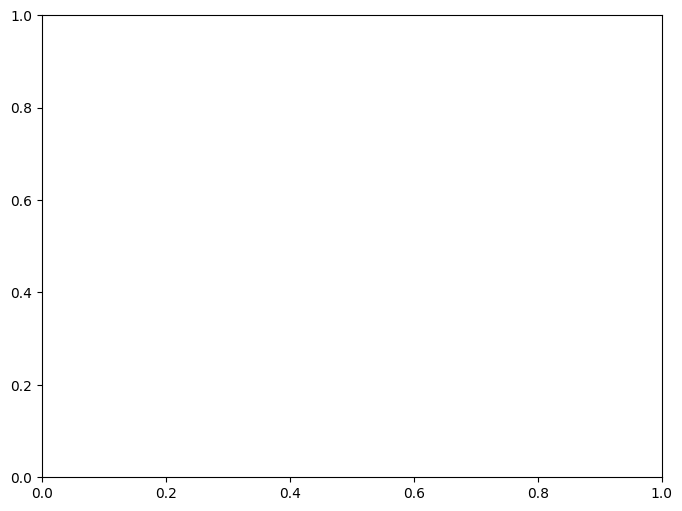

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

X.plot(x="latitude", y="longitude", kind="scatter", ax=ax, 
       c=kmeans.labels_, cmap="tab10", colorbar=False, s=50)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["latitude", "longitude"])

centroids.plot(x="latitude", y="longitude", kind="scatter", ax=ax, 
               color="red", marker="X", s=200, label="Centroids")

plt.legend()
plt.show()

In [8]:
X["timestamp"] = pd.to_datetime(X["timestamp"])
vehicles_t10 = X[(X["vehicle_type"] == 10) & 
    (X["timestamp"].dt.hour.isin([0, 1]))].copy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(vehicles_t10[["latitude", "longitude"]])

centers = kmeans.cluster_centers_
sorted_centers = centers[centers[:, 0].argsort()]

task3_rows = pd.DataFrame({
    "subtaskID": 3,
    "Value1": sorted_centers[:, 0], 
    "Value2": sorted_centers[:, 1]  
})

Solution = pd.concat([Solution, task3_rows], ignore_index=True)

In [9]:
Solution.to_csv("submission.csv", index=None)

Solution.tail()

,subtaskID,Value1,Value2
662,2,662.000000,1.000000
663,2,663.000000,0.000000
664,3,64.863212,16.432879
665,3,64.905002,16.438920
666,3,64.910779,16.400842
